In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
from TVA1_UU import TVA1_UU as BHDVCS #modified bhdvcs file
import utilities as uts #general utilities that are useful for all methods
import sys
import scipy.optimize as opt
import math
import plotly.graph_objects as go

In [74]:
data = pd.read_csv('dvcs_xs_May-2021_342_sets_with_trueCFFs.csv')

bhdvcs = BHDVCS()
dvcsdata = uts.DvcsData(data)
def getSet(sets, setNum, itemsInSet=45):
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    return sets[a:b]

In [17]:
def gd(setNum, epochs):
    reh = 1.1
    ree = 0
    reht = 1
    dreh = .1
    dree = 1
    dreht = .1
    lr = 1
    dats = getSet(data, setNum-1)
    n = np.array(dats['#Set'])
    ind = np.array(dats['index'])
    k = np.array(dats['k'])
    qq = np.array(dats['QQ'])
    xb = np.array(dats['x_b'])
    t = np.array(dats['t'])
    phi = np.array(dats['phi_x'])
    F = np.array(dats['F'])
    errF = np.array(dats['sigmaF'])
    varF = np.array(dats['varF']) 
    F1 = np.array(dats['F1'])
    F2 = np.array(dats['F2'])
    const = np.array(dats['dvcs'])
    trueReH = np.array(dats['ReH'])
    trueReE = np.array(dats['ReE'])
    trueReHT = np.array(dats['ReHTilde'])
    xdat = np.transpose(np.array([phi, k, qq, xb, t, F1, F2, const]))
    
    for x in range(epochs):
        mse = np.mean(np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,reh,ree,reht)),2))
        msereh = np.mean(np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,reh+dreh,ree,reht)),2))
        mseree = np.mean(np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,reh,ree+dree,reht)),2))
        msereht = np.mean(np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,reh,ree,reht+dreht)),2))
        reh = reh - (msereh - mse) * lr
        ree = ree - (mseree - mse) * lr
        reht= reht- (msereht- mse) * lr
        print("epoch " + str(x+1) + ": " + str(mse))
    print(np.array([reh, ree, reht]))

In [122]:
def fit(setNum):
    dats = getSet(data, setNum-1)
    n = np.array(dats['#Set'])
    ind = np.array(dats['index'])
    k = np.array(dats['k'])
    qq = np.array(dats['QQ'])
    xb = np.array(dats['x_b'])
    t = np.array(dats['t'])
    phi = np.array(dats['phi_x'])
    F = np.array(dats['F'])
    errF = np.array(dats['sigmaF'])
    varF = np.array(dats['varF']) 
    F1 = np.array(dats['F1'])
    F2 = np.array(dats['F2'])
    const = np.array(dats['dvcs'])
    trueReH = np.array(dats['ReH'])
    trueReE = np.array(dats['ReE'])
    trueReHT = np.array(dats['ReHTilde'])
    xdat = np.transpose(np.array([phi, k, qq, xb, t, F1, F2, const]))
    print(xdat.shape)
    param = np.array([ 1.30131, -2.20789, 4.35799])
    fitcoefs = np.empty((0,3))    
    for x in range(0,10):
        fit, fitcov = opt.curve_fit(bhdvcs.TotalUUXS, xdat, np.random.normal(F, errF), param, method='dogbox')
        fitcoefs = np.append(fitcoefs,[fit],axis=0)
    fit = fitcoefs.mean(axis=0)
    rmse = math.sqrt(np.mean(np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,fit[0],fit[1],fit[2])),2)))
    fit1, fitcov = opt.curve_fit(bhdvcs.TotalUUXS, xdat, F, param, method='dogbox')
    print(fit1)
    print(fit)
    print(np.std(fitcoefs,axis=0))
    print(rmse)
    print(np.array([trueReH[0],trueReE[0],trueReHT[0]]))
    print(math.sqrt(np.mean(np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,trueReH,trueReE,trueReHT)),2))))
    return fit

In [123]:
fit(10)

(44, 8)
[ 0.50653216 26.78743022 -0.53537552]
[ 0.90606338 17.86658705  1.05322902]
[ 2.06365397 49.2301086   7.72672761]
0.009322749349036184
[ 1.30131 -2.20789  4.35799]
0.009585913388358637


array([ 0.90606338, 17.86658705,  1.05322902])

[  1.88449373 -72.32425805   5.17995149]
0.037884543351613065
[ 0.743515 -1.58545   3.34929 ]
0.04393489715987629


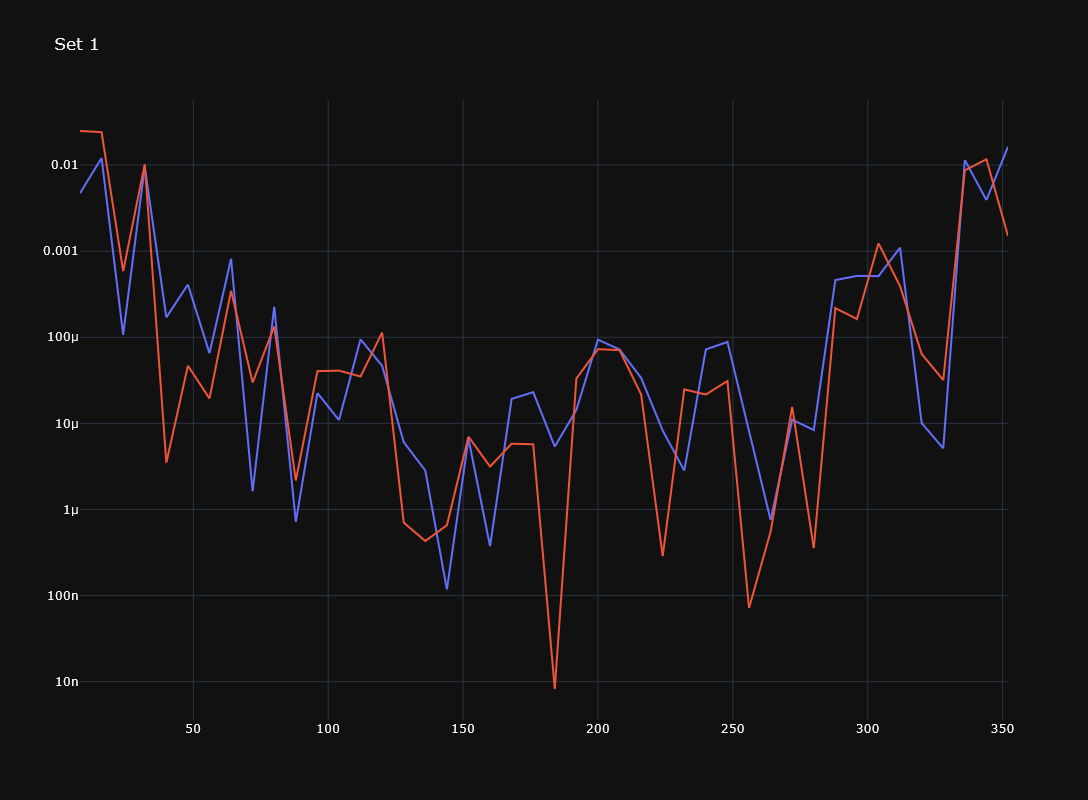

In [72]:
def test(setNum, fit):
    dats = getSet(data, setNum-1)
    n = np.array(dats['#Set'])
    ind = np.array(dats['index'])
    k = np.array(dats['k'])
    qq = np.array(dats['QQ'])
    xb = np.array(dats['x_b'])
    t = np.array(dats['t'])
    phi = np.array(dats['phi_x'])
    F = np.array(dats['F'])
    errF = np.array(dats['sigmaF'])
    varF = np.array(dats['varF']) 
    F1 = np.array(dats['F1'])
    F2 = np.array(dats['F2'])
    const = np.array(dats['dvcs'])
    trueReH = np.array(dats['ReH'])
    trueReE = np.array(dats['ReE'])
    trueReHT = np.array(dats['ReHTilde'])
    xdat = np.transpose(np.array([phi, k, qq, xb, t, F1, F2, const]))
    fig = go.Figure()
    
    se = np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,fit[0],fit[1],fit[2])),2)
    #fig.add_trace(go.Bar(x=phi, y=se, name='Fit'))
    fig.add_trace(go.Scatter(x=phi, y=se, mode='lines', name='Fit'))
    truese = np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,trueReH[0],trueReE[0],trueReHT[0])),2)
    #fig.add_trace(go.Bar(x=phi, y=truese, name='True'))
    fig.add_trace(go.Scatter(x=phi, y=truese, mode='lines', name='True'))
    fig.update_yaxes(type="log")
    fig.update_layout(template="plotly_dark",title_text="Set "+str(setNum),showlegend=False,width=800,height=800)
    fig.show()
test(1, gridfit(1))

[  4.05653069 -41.04334219  15.88840387]
0.006349363046000822
[ 1.52024 -2.41063  4.72193]
0.0064364789868566405
str RMSE 16 : 0.006349363046000822
True RMSE 16: 0.0064364789868566405


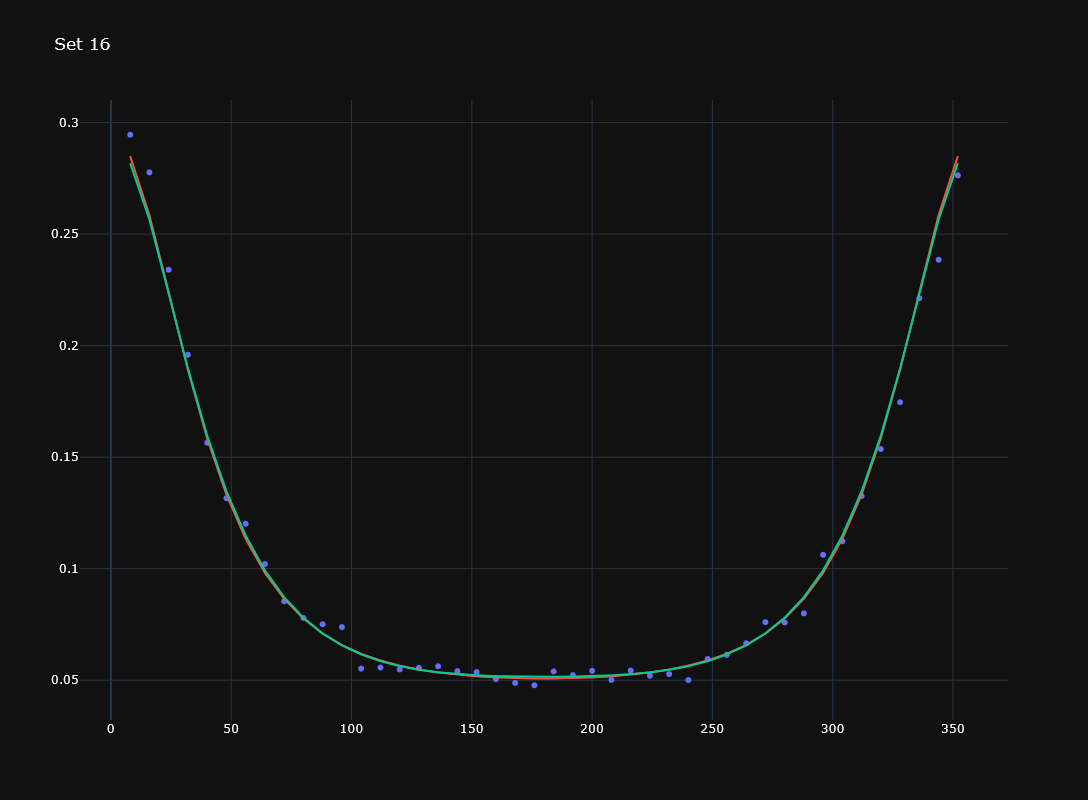

In [73]:
stuff(15, gridfit(15))

In [57]:
def stuff(setNum, fit):
    dats = getSet(data, setNum-1)
    n = np.array(dats['#Set'])
    ind = np.array(dats['index'])
    k = np.array(dats['k'])
    qq = np.array(dats['QQ'])
    xb = np.array(dats['x_b'])
    t = np.array(dats['t'])
    phi = np.array(dats['phi_x'])
    F = np.array(dats['F'])
    errF = np.array(dats['sigmaF'])
    varF = np.array(dats['varF']) 
    F1 = np.array(dats['F1'])
    F2 = np.array(dats['F2'])
    const = np.array(dats['dvcs'])
    trueReH = np.array(dats['ReH'])
    trueReE = np.array(dats['ReE'])
    trueReHT = np.array(dats['ReHTilde'])
    xdat = np.transpose(np.array([phi, k, qq, xb, t, F1, F2, const]))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=phi, y=F, mode='markers'))
    fig.add_trace(go.Scatter(x=phi, y=bhdvcs.TotalUUXS(xdat,fit[0],fit[1],fit[2]), mode='lines', name='Fit'))
    rmse = math.sqrt(np.mean(np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,fit[0],fit[1],fit[2])),2)))
    print("str RMSE "+str(setNum+1)+" : "+str(rmse))
    #print(str(round(ReHfit,5)) + str(round(ReEfit,5)) + str(round(ReHTfit,5)))
    fig.add_trace(go.Scatter(x=phi, y=bhdvcs.TotalUUXS(xdat,trueReH[0],trueReE[0],trueReHT[0]), mode='lines', name='True'))
    rmset = math.sqrt(np.mean(np.power(np.subtract(F,bhdvcs.TotalUUXS(xdat,trueReH[0],trueReE[0],trueReHT[0])),2)))
    print("True RMSE "+str(setNum+1)+": "+str(rmset))
    #print(str(round(trueReH[a],5)) + str(round(trueReE[a],5)) + str(round(trueReHT[a],5)))
    #fig.add_annotation(text="RMSE: "+str(rmse),showarrow=False)
    fig.update_layout(template="plotly_dark",title_text="Set "+str(setNum+1),showlegend=False,width=800,height=800)
    #plt.savefig('Histogram_'+str(setNum)+'.png', dpi=300)
    fig.show()